## 1. Data Collection

Dataset: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import joblib

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## 2. Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

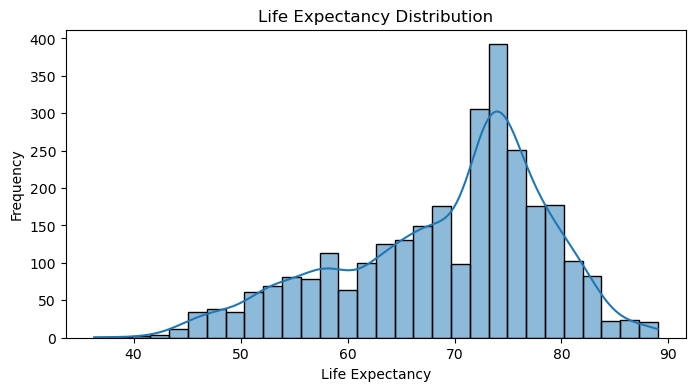

In [6]:
# Histogram of Life Expectancy Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Life expectancy '], bins=30, kde=True)
plt.title('Life Expectancy Distribution')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.savefig("distribution.png", transparent=True)
plt.show()

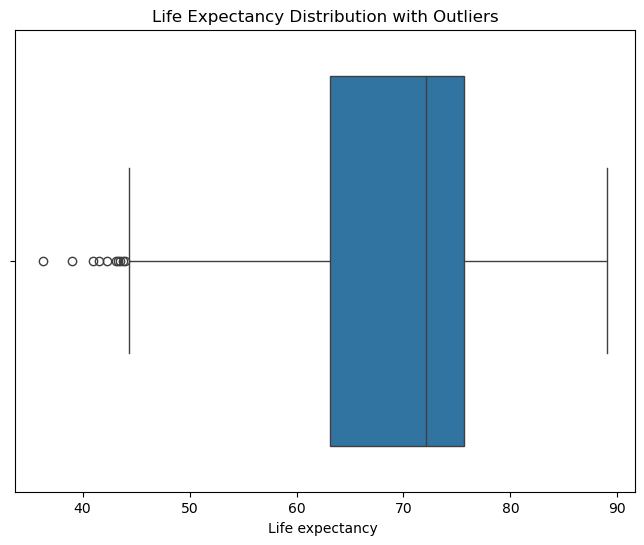

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Life expectancy '])
plt.title('Life Expectancy Distribution with Outliers')
plt.savefig("outliers.png", transparent=True)
plt.show()

There is something strange: several points are outside the whiskers (on the left). Let's investigate with a horizontal bar plot to see if there is any data that differs from the others (for example, null data).

/tmp/ipykernel_3951/893240640.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_means.values, y=country_means.index, palette='viridis')


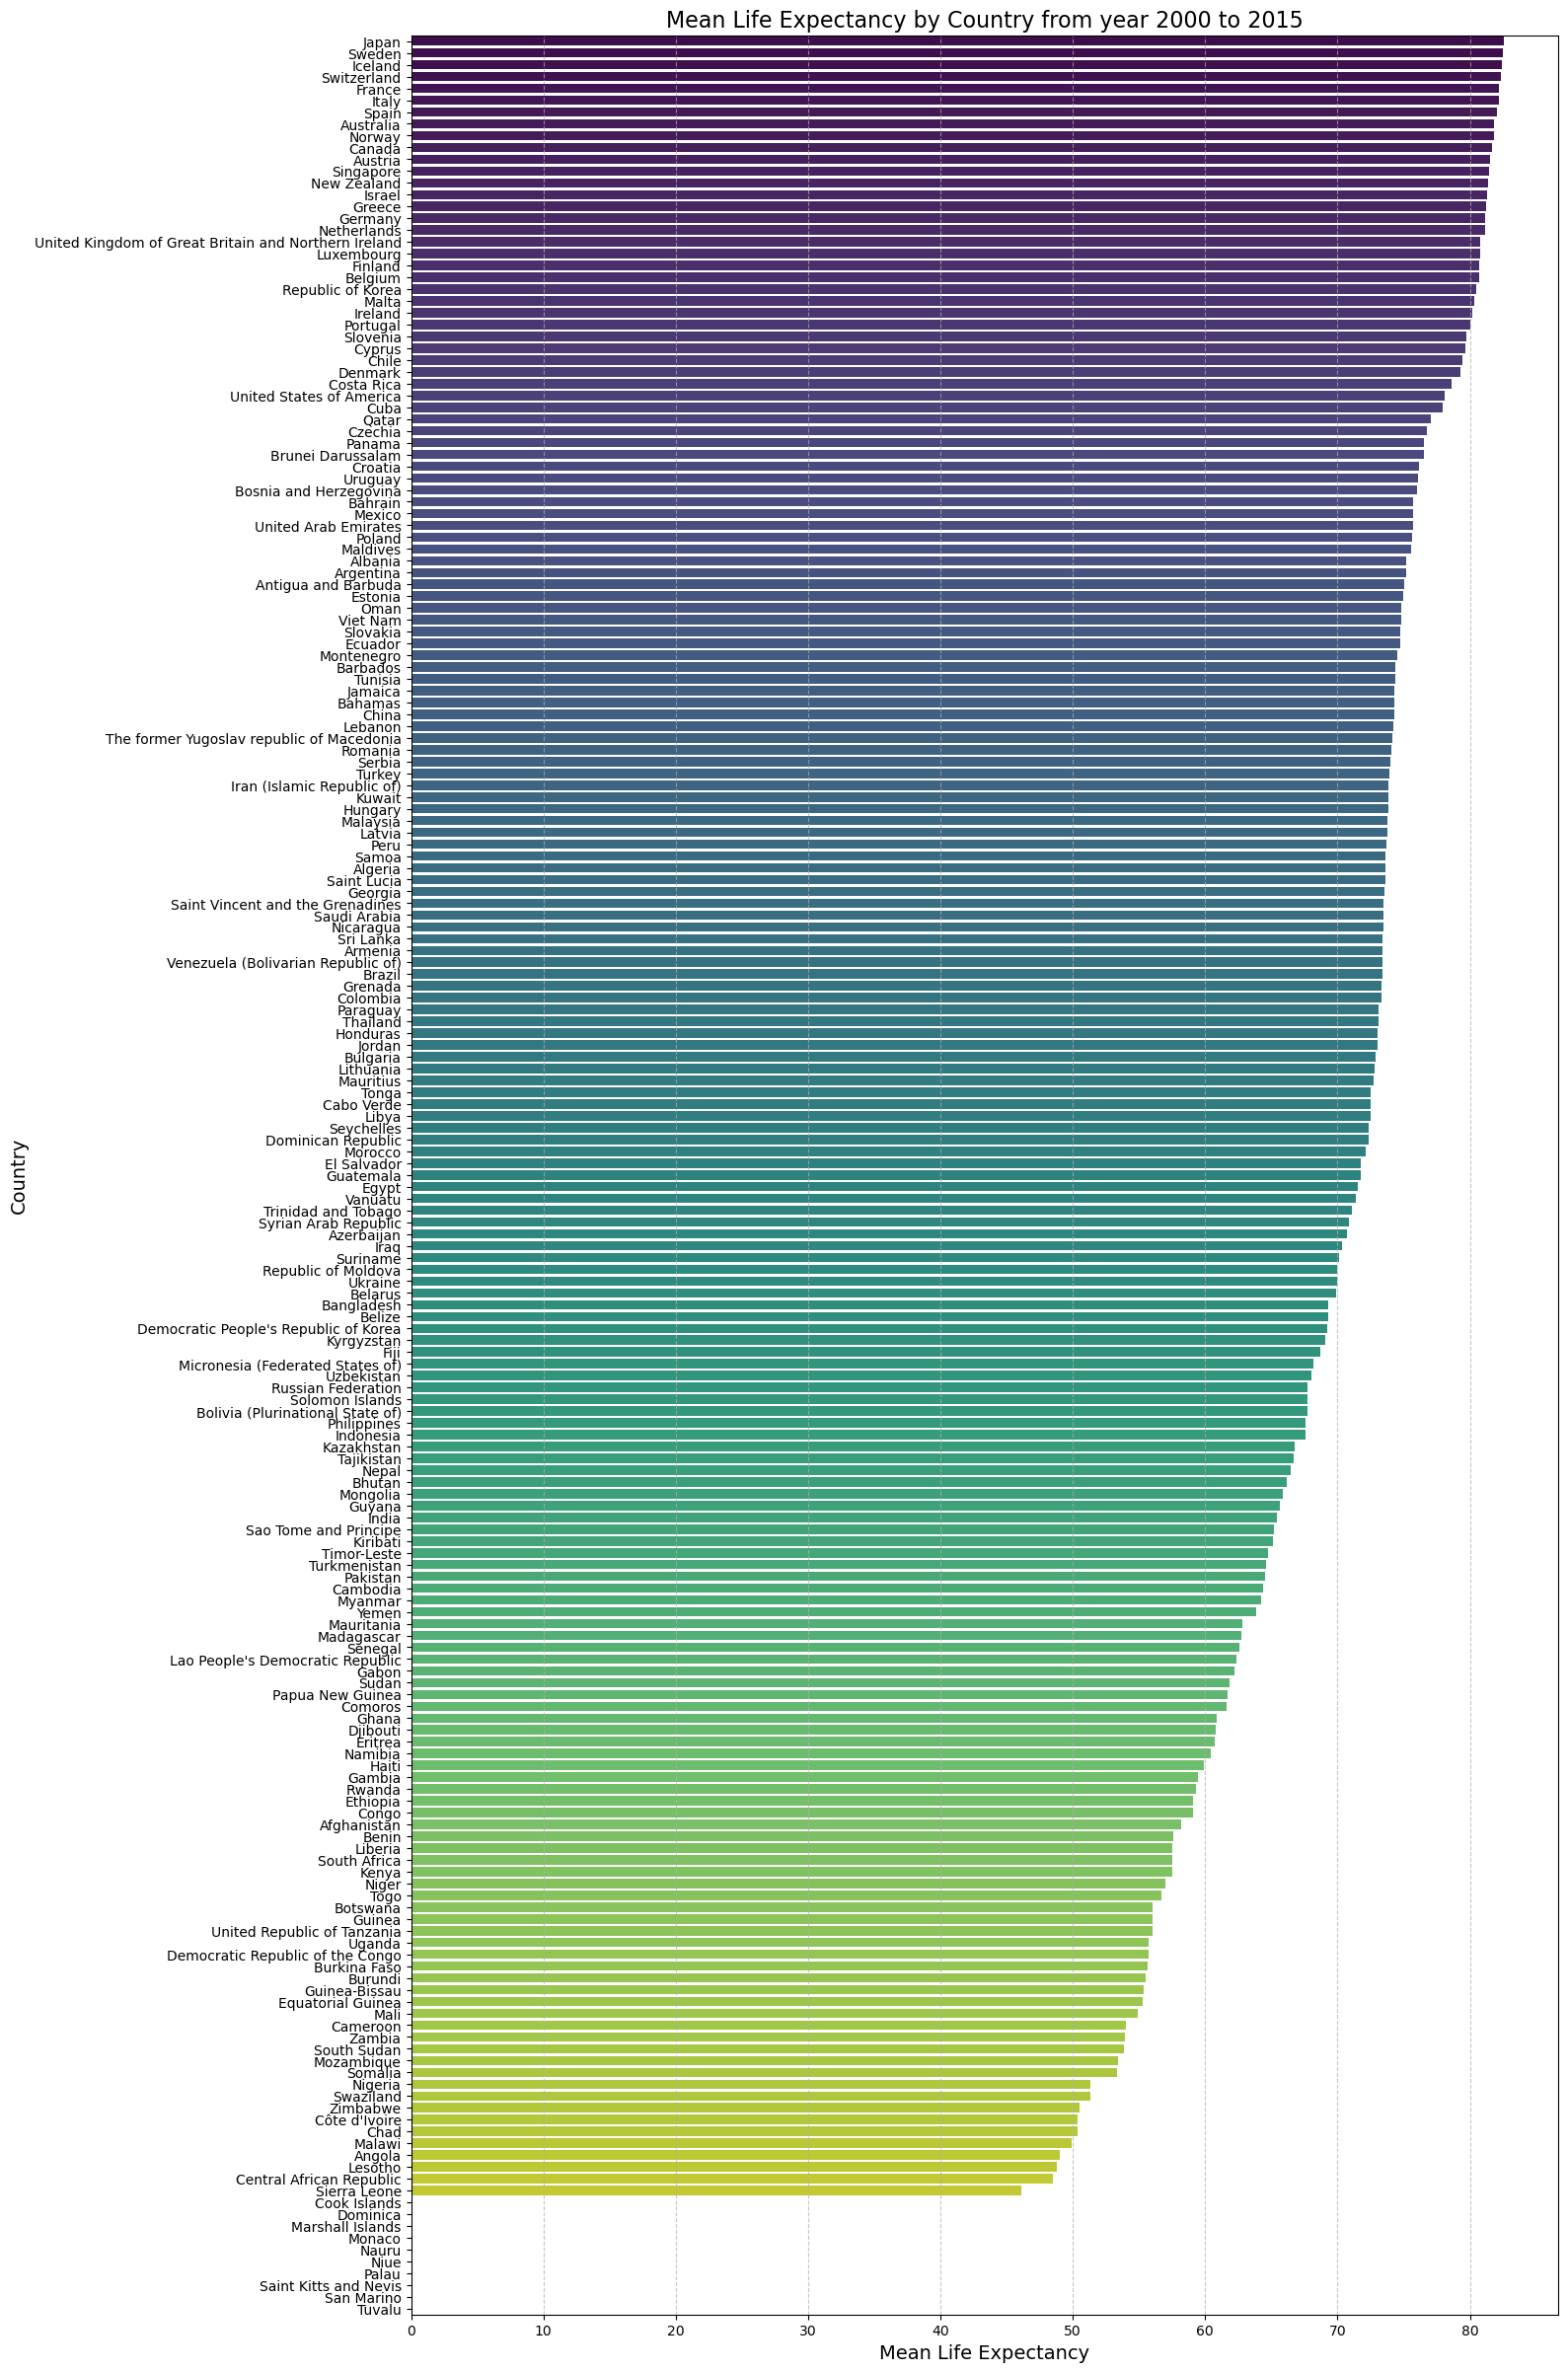

In [8]:
# Horizontal Bar Plot for Mean Life Expectancy by Country
plt.figure(figsize=(15, 30))
country_means = df.groupby('Country')['Life expectancy '].mean().sort_values(ascending=False)
sns.barplot(x=country_means.values, y=country_means.index, palette='viridis')
plt.title('Mean Life Expectancy by Country from year 2000 to 2015', fontsize=16)
plt.xlabel('Mean Life Expectancy', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig("mean-life-expectancy.png", transparent=True)
plt.show()

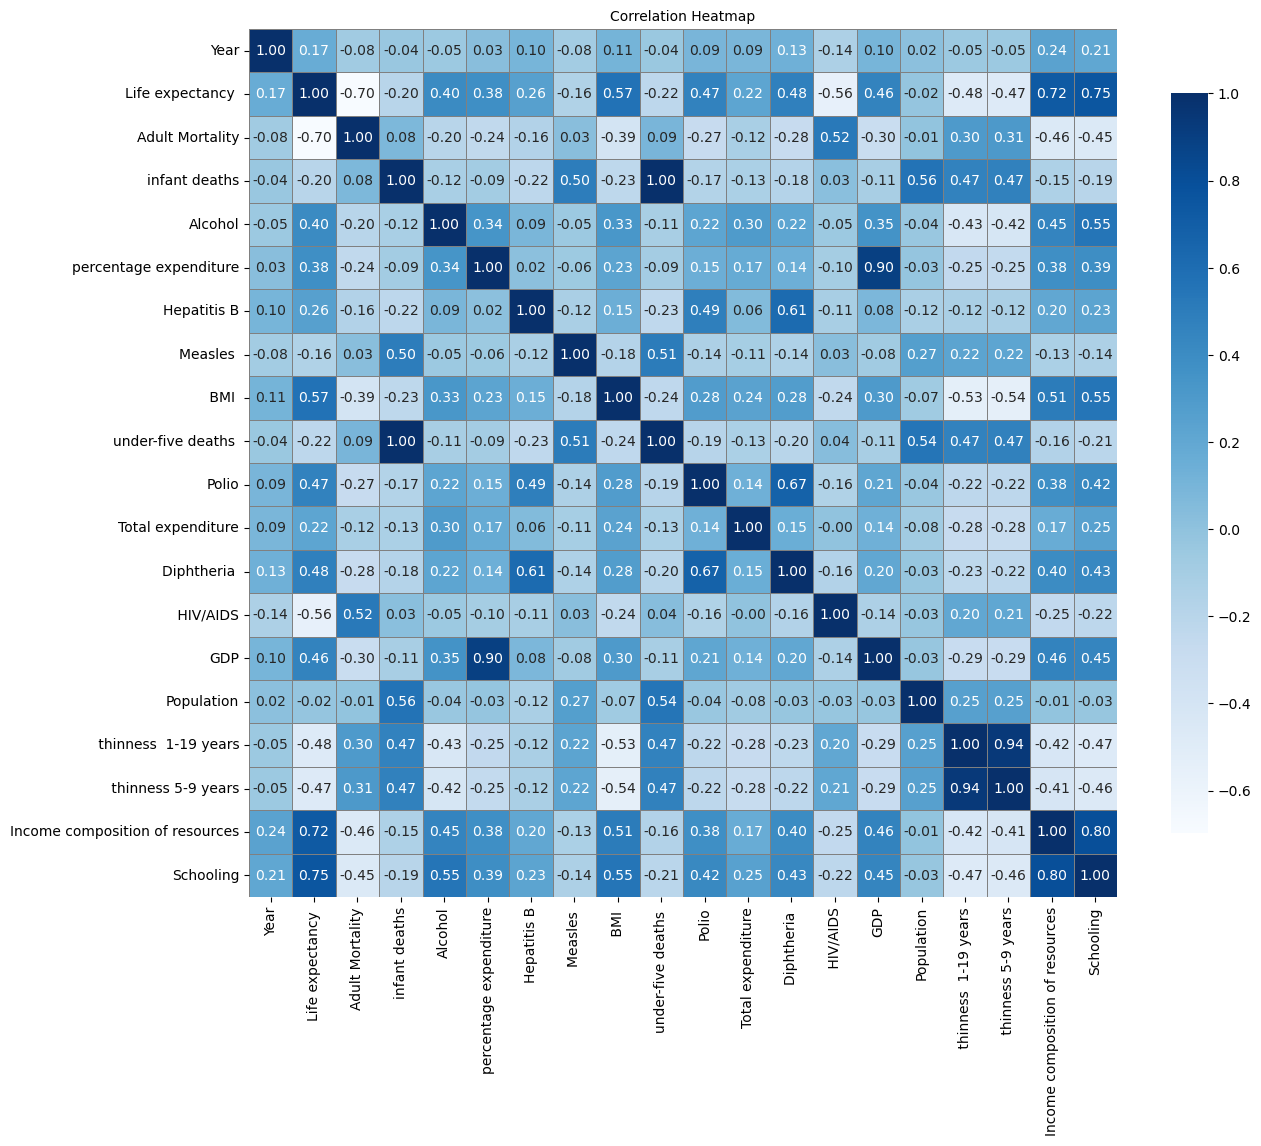

In [9]:
# Only use the numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Correlation Heatmap
plt.figure(figsize=(14, 12))
plt.title('Correlation Heatmap', fontsize=10)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Blues', square=True, 
            cbar_kws={"shrink": .8}, linewidths=.5, linecolor='gray')
plt.savefig("life-expectancy-heatmap.png", transparent=True)
plt.show()

In [10]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

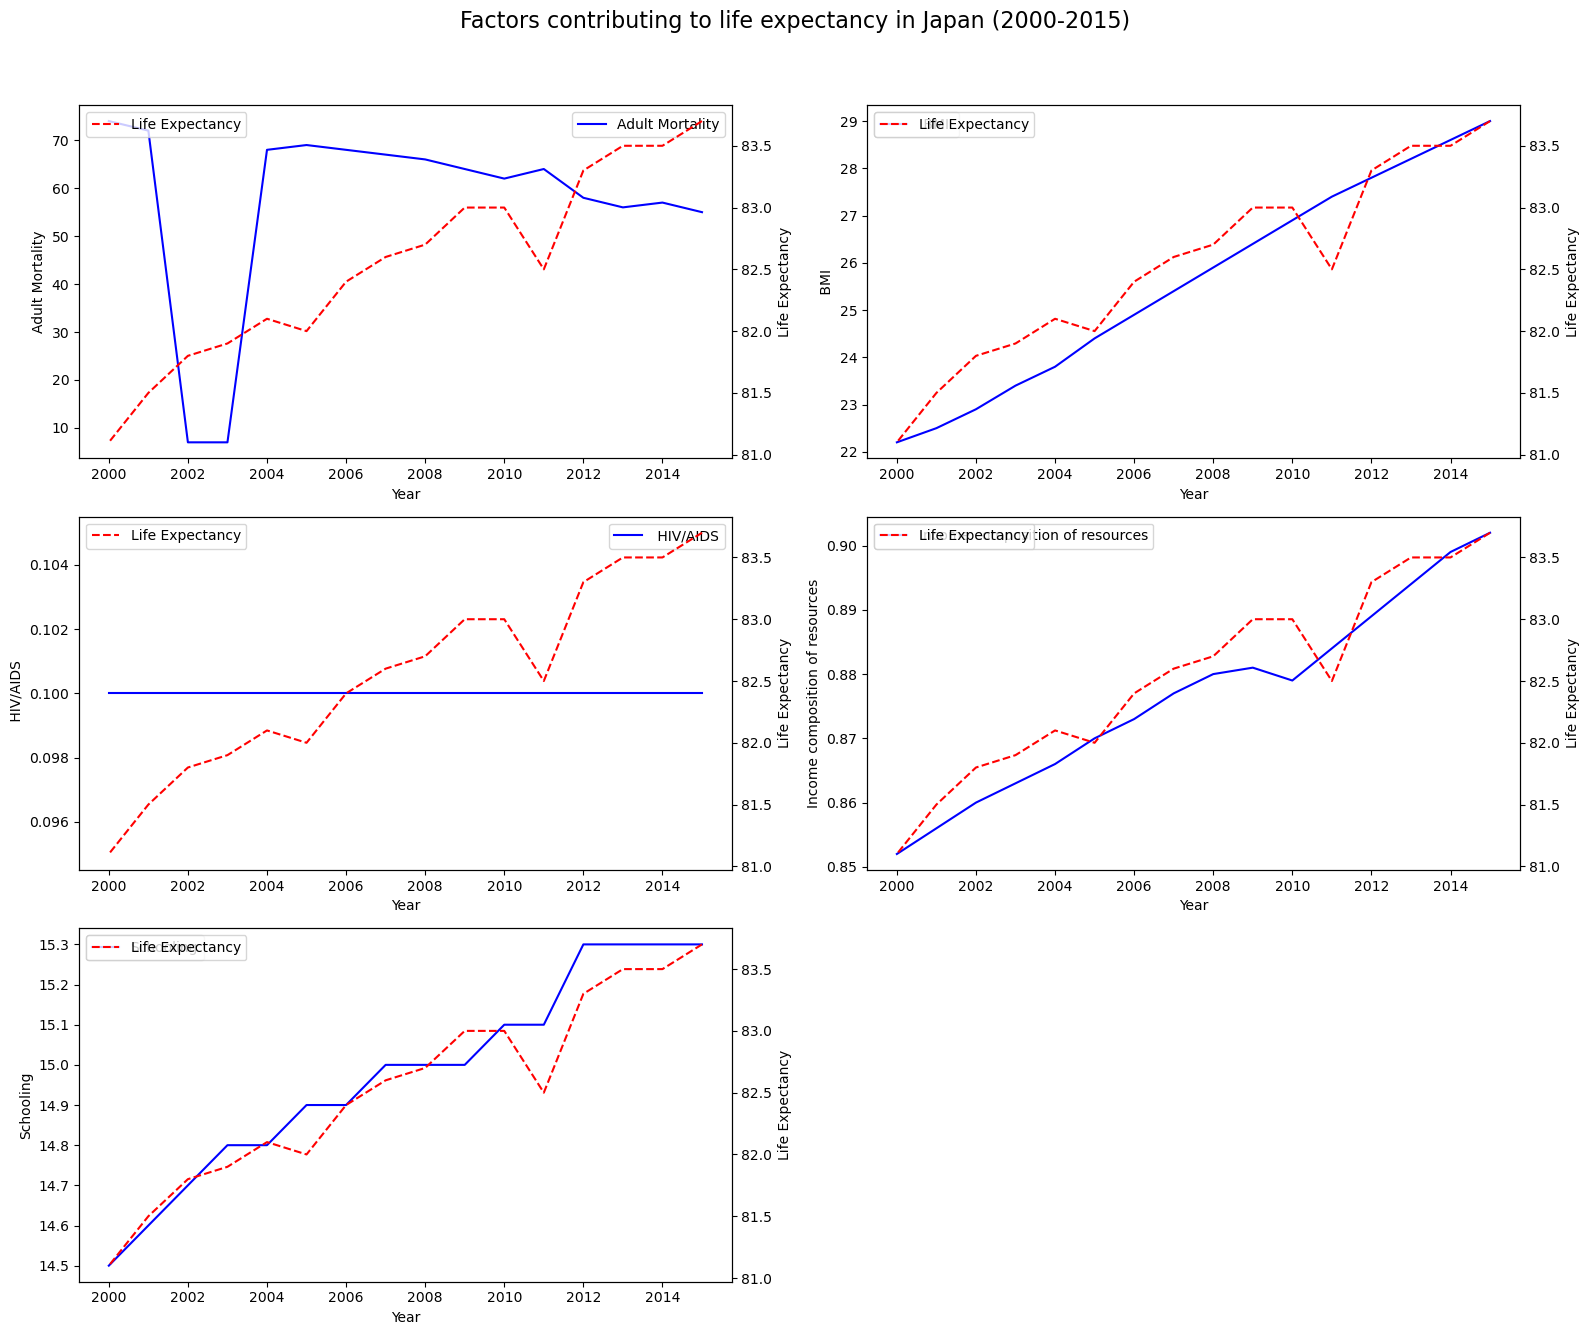

In [11]:
# Life Expectancy Factors in Japan

# Use boolean indexing to filter the DataFrame to only include rows where the 'Country' column has the value 'Japan'
japan = df[df['Country']=='Japan']

# List of features to plot
features = ['Adult Mortality',' BMI ',' HIV/AIDS', 'Income composition of resources', 'Schooling']
years = japan['Year']

# Define the figure and Grindspec layout
fig = plt.figure(figsize=(16,14))
fig.suptitle('Factors contributing to life expectancy in Japan (2000-2015)', fontsize=16)

# Create a Gridspec with 2 rows only: first row with 3 subplots and second row with 2 subplots
gs = fig.add_gridspec(3,2)

# Plot the first 3 features in the FIRST row (1x3 layout)
for i in range(2): # Loop over the first 2 features in `features` list
    ax = fig.add_subplot(gs[0, i]) # 0 is the first row, i is the column index as we iterate
    feature = features[i] # Retrieve the feature to be plotted for the current subplot
    ax.plot(years,japan[feature],color='blue',label=feature) # Plot the current feature against years
    ax.set_xlabel('Year') # Label the x-axis as "Year"
    ax.set_ylabel(feature) # Label the y-axis with the name of the feature being plotted
    ax.legend() # Display the feature name as a legend 
    ax2 = ax.twinx() # Create a secondary y-axis for each subplot to plot life expectancy alongside the feature
    ax2.plot(years,japan['Life expectancy '], color='red', linestyle='--', label='Life Expectancy')
    ax2.set_ylabel('Life Expectancy')
    ax2.legend(loc='upper left')

# Plot the next 2 features in the SECOND row (1x2 layout)
for i in range(2): # Loop over the next 2 features in `features` list
    ax = fig.add_subplot(gs[1,i])
    feature = features[i + 2]
    ax.plot(years, japan[feature], color = 'blue', label = feature)
    ax.set_xlabel('Year')
    ax.set_ylabel(feature)
    ax.legend()
    ax2 = ax.twinx()
    ax2.plot(years, japan['Life expectancy '],color='red', linestyle='--', label='Life Expectancy')
    ax2.set_ylabel('Life Expectancy')
    ax2.legend(loc='upper left')

# Plot the last feature in the THIRD row (1x1 layout)
for i in range(1): # Loop over the last feature in 'features' list
    ax = fig.add_subplot(gs[2,i])
    feature = features[i + 4]
    ax.plot(years, japan[feature], color = 'blue', label = feature)
    ax.set_xlabel('Year')
    ax.set_ylabel(feature)
    ax.legend()
    ax2 = ax.twinx()
    ax2.plot(years, japan['Life expectancy '],color='red', linestyle='--', label='Life Expectancy')
    ax2.set_ylabel('Life Expectancy')
    ax2.legend(loc='upper left')
    
# Adjust layout for readability
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("japan-factors.png", transparent=True)
plt.show()

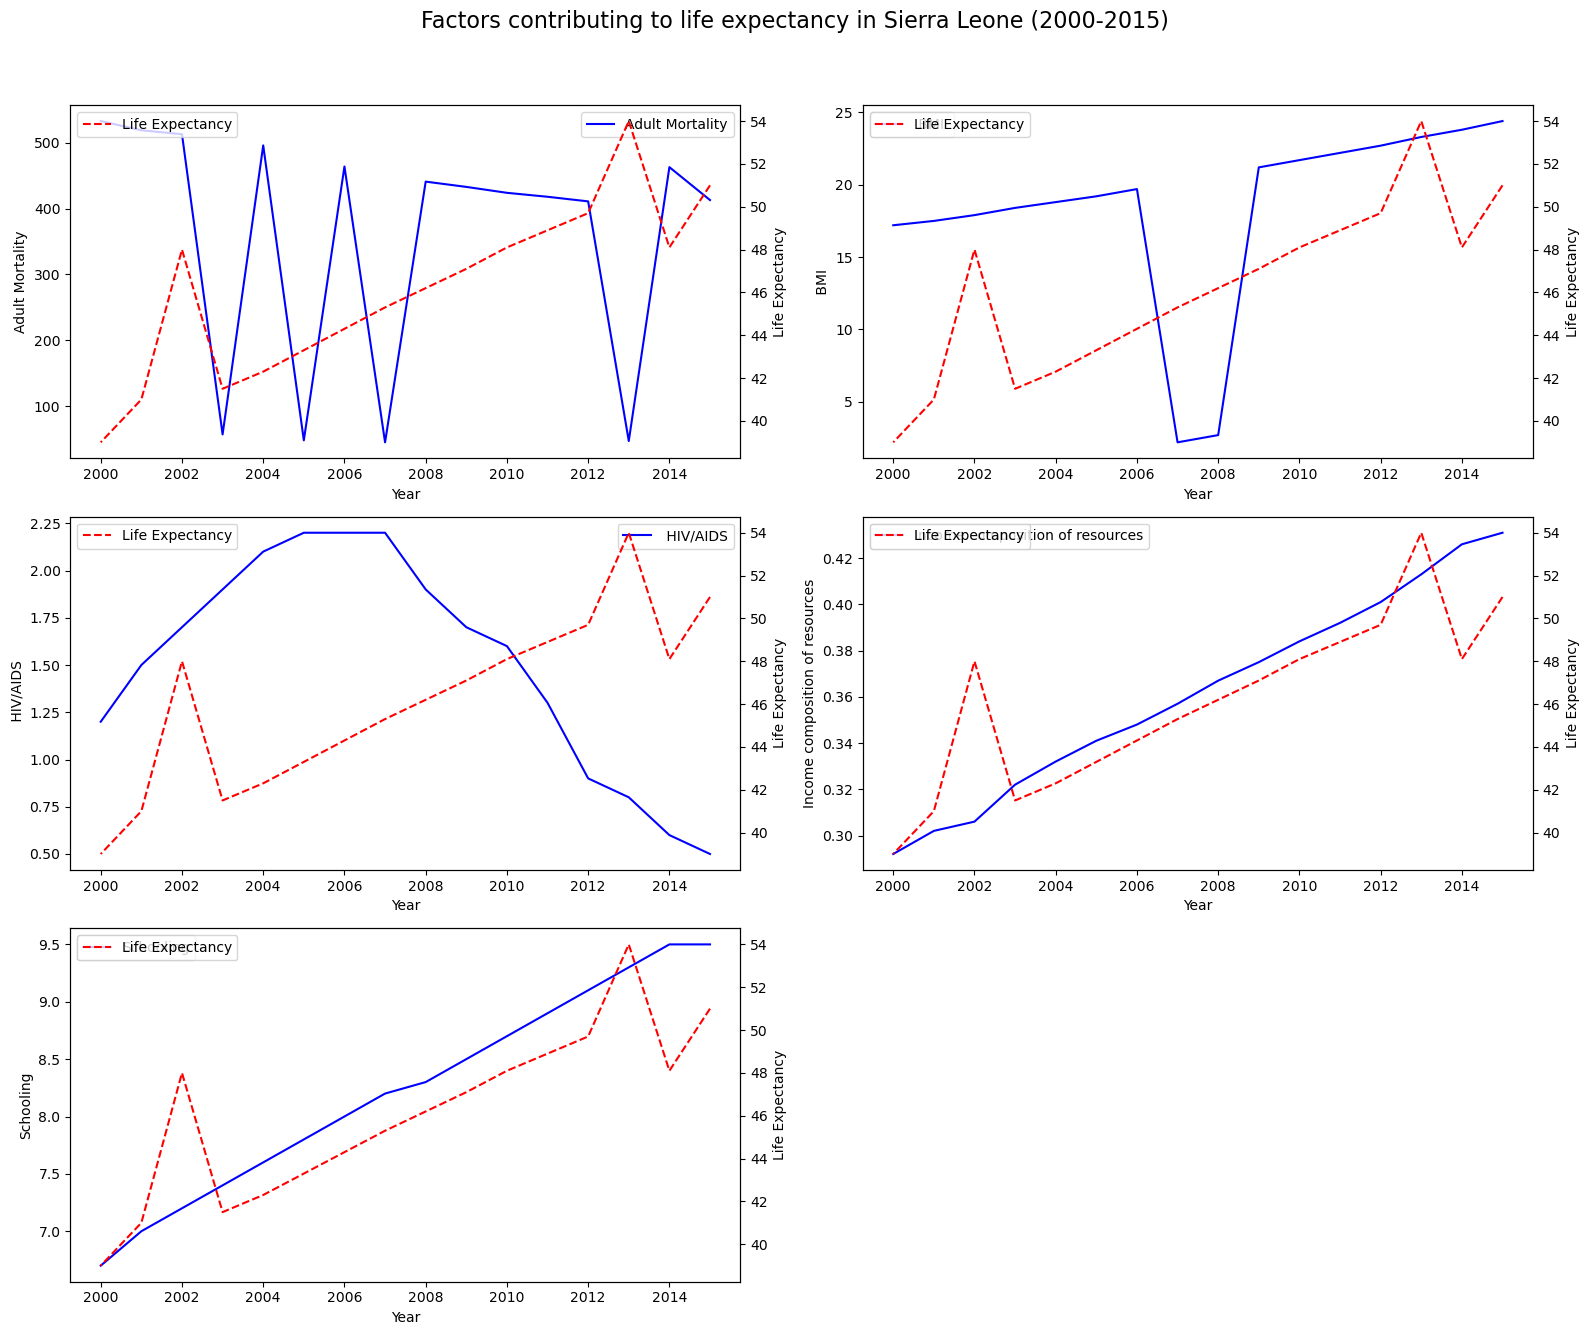

In [12]:
# Use boolean indexing to filter the DataFrame to only include rows where the 'Country' column has the value 'Sierra Leone'
sierra_leone = df[df['Country']=='Sierra Leone']

# List of features to plot
features = ['Adult Mortality',' BMI ',' HIV/AIDS', 'Income composition of resources', 'Schooling']
years = sierra_leone['Year']

# Define the figure and Grindspec layout
fig = plt.figure(figsize=(16,14))
fig.suptitle('Factors contributing to life expectancy in Sierra Leone (2000-2015)', fontsize=16)

# Create a Gridspec with 2 rows only: first row with 3 subplots and second row with 2 subplots
gs = fig.add_gridspec(3,2)

# Plot the first 3 features in the FIRST row (1x3 layout)
for i in range(2): 
    ax = fig.add_subplot(gs[0, i])
    feature = features[i]
    ax.plot(years,sierra_leone[feature],color='blue',label=feature)
    ax.set_xlabel('Year') 
    ax.set_ylabel(feature) 
    ax.legend() 
    ax2 = ax.twinx() 
    ax2.plot(years,sierra_leone['Life expectancy '], color='red', linestyle='--', label='Life Expectancy')
    ax2.set_ylabel('Life Expectancy')
    ax2.legend(loc='upper left')

# Plot the next 2 features in the SECOND row (1x2 layout)
for i in range(2): # Loop over the next 2 features in `features` list
    ax = fig.add_subplot(gs[1,i])
    feature = features[i + 2]
    ax.plot(years, sierra_leone[feature], color = 'blue', label = feature)
    ax.set_xlabel('Year')
    ax.set_ylabel(feature)
    ax.legend()
    ax2 = ax.twinx()
    ax2.plot(years, sierra_leone['Life expectancy '],color='red', linestyle='--', label='Life Expectancy')
    ax2.set_ylabel('Life Expectancy')
    ax2.legend(loc='upper left')

# Plot the last feature in the THIRD row (1x1 layout)
for i in range(1): # Loop over the last feature in 'features' list
    ax = fig.add_subplot(gs[2,i])
    feature = features[i + 4]
    ax.plot(years, sierra_leone[feature], color = 'blue', label = feature)
    ax.set_xlabel('Year')
    ax.set_ylabel(feature)
    ax.legend()
    ax2 = ax.twinx()
    ax2.plot(years, sierra_leone['Life expectancy '],color='red', linestyle='--', label='Life Expectancy')
    ax2.set_ylabel('Life Expectancy')
    ax2.legend(loc='upper left')
    
# Adjust layout for readability
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("sierra-leone-factors.png", transparent=True)
plt.show()

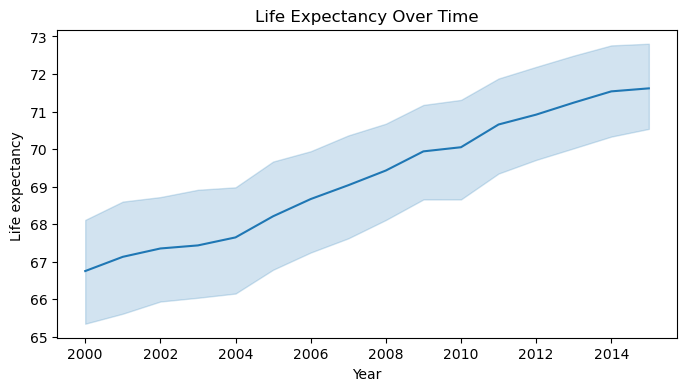

In [13]:
plt.figure(figsize=(8, 4))
sns.lineplot(x='Year', y='Life expectancy ', data=df)
plt.title('Life Expectancy Over Time')
plt.savefig("life-expectancy-lineplot.png", transparent = True)
plt.show()

In [14]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

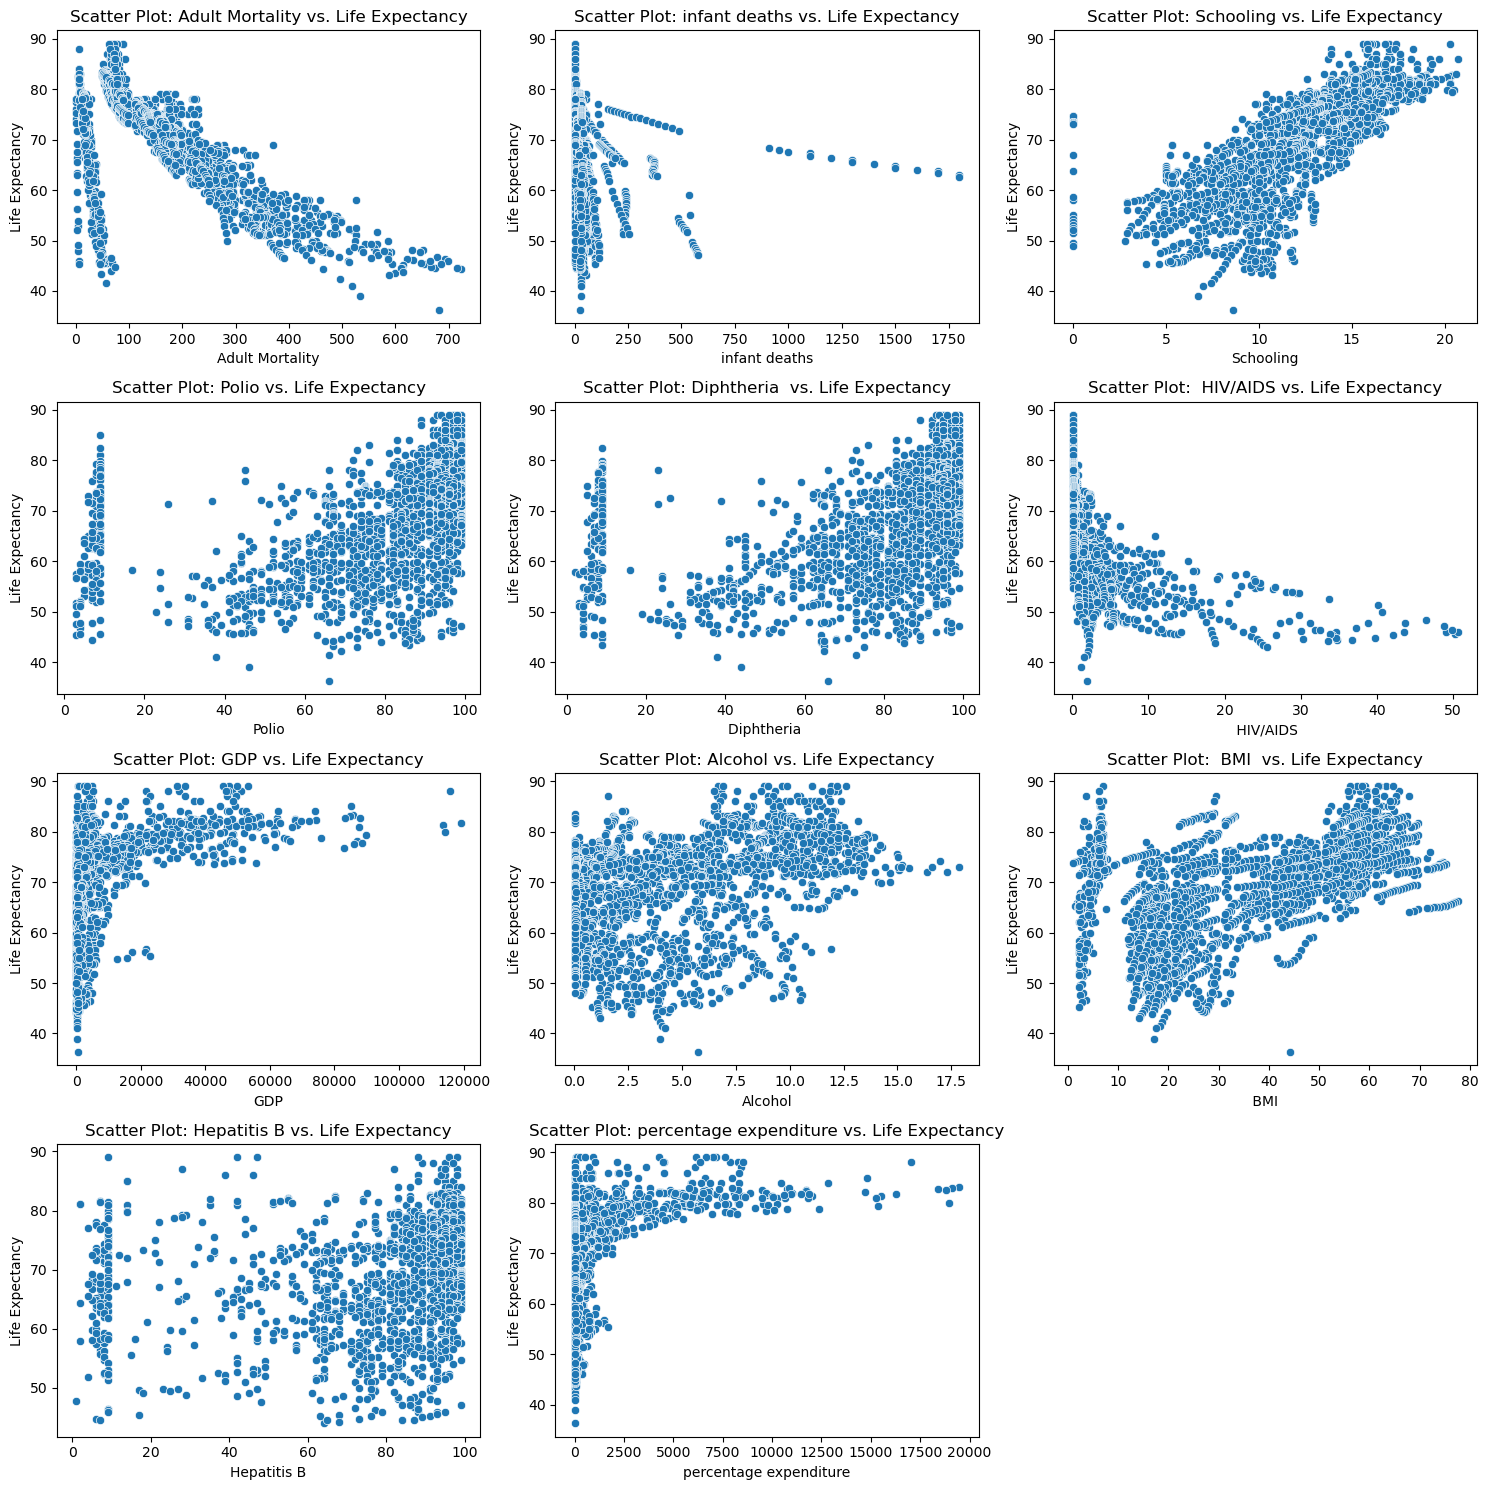

In [15]:
# Scatter plots to visualize relationships with the target variable
features_to_check = ['Adult Mortality', 'infant deaths', 'Schooling', 'Polio',
                     'Diphtheria ',' HIV/AIDS','GDP','Alcohol',' BMI ','Hepatitis B',
                     'percentage expenditure'] # Choose features randomly to check the nonlinearity of the data

plt.figure(figsize=(15, 15))  # Adjust the height for better spacing

# Use 4 rows and 3 columns to fit all 11 features
rows = 4
cols = 3

for i, feature in enumerate(features_to_check):  # Assuming features_to_check has 11 features
    plt.subplot(rows, cols, i + 1)
    sns.scatterplot(data=df, x=feature, y='Life expectancy ')
    plt.title(f'Scatter Plot: {feature} vs. Life Expectancy')
    plt.xlabel(feature)
    plt.ylabel('Life Expectancy')

plt.tight_layout()
plt.savefig("life-expectancy-scatter-plots.png", transparent=True)
plt.show()

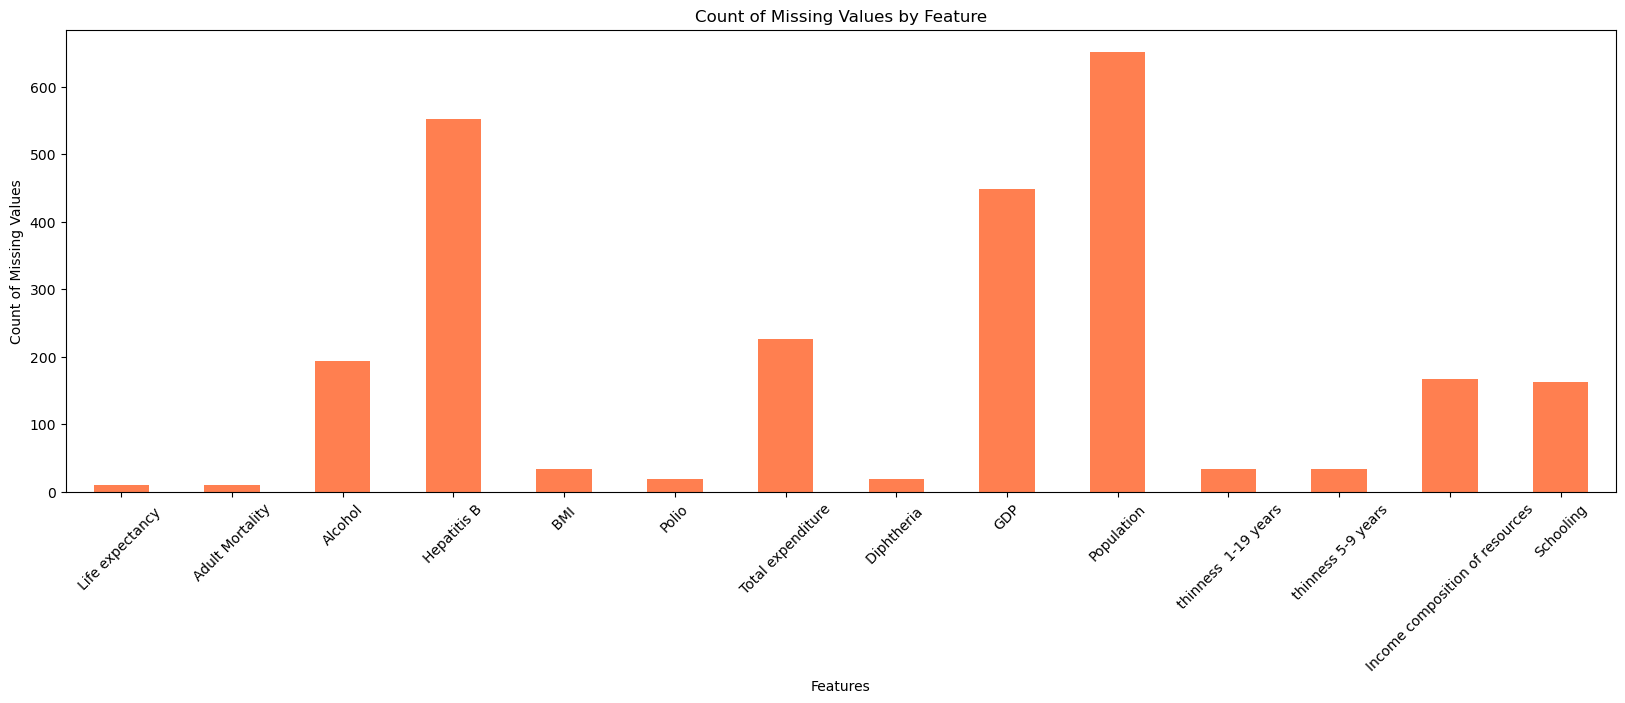

In [16]:
missing_counts = df.isnull().sum()

# Bar plot for missing values
plt.figure(figsize=(20, 6))
missing_counts[missing_counts > 0].plot(kind='bar', color='coral')
plt.title('Count of Missing Values by Feature')
plt.xlabel('Features')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=45)
plt.savefig("missing-values.png", transparent=True)
plt.show()

In [17]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [18]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## 3. Data Preprocessing

### Identify Duplicate Rows

In [19]:
duplicates = df.duplicated()
duplicate_rows = df[duplicates]
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


### Handle Missing Data

In [20]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [21]:
columns_to_fill = ['Life expectancy ','Adult Mortality','Alcohol', 'Hepatitis B',
                   ' BMI ','Polio','Total expenditure','Diphtheria ','GDP',
                   'Population',' thinness  1-19 years',' thinness 5-9 years',
                   'Income composition of resources','Schooling']

for col in columns_to_fill:
    df[col]=df[col].fillna(df[col].mean())

In [22]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

### One-Hot Encoding

In [23]:
df_encoded = pd.get_dummies(df, columns=['Status'], drop_first=True)

In [24]:
df_encoded.head()

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,Afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,True
1,Afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,True
2,Afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,True
3,Afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,True
4,Afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,True


### Feature Scaling

In [25]:
scaler = StandardScaler()

In [26]:
# Identify numerical columns, excluding 'Year'
numerical_columns = df_encoded.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_columns.remove('Year')

# Feature Scaling for all numerical columns except 'Year'
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

In [27]:
print(df_encoded)

          Country  Year  Life expectancy   Adult Mortality  infant deaths  \
0     Afghanistan  2015         -0.444448         0.791586       0.268824   
1     Afghanistan  2014         -0.980950         0.856072       0.285786   
2     Afghanistan  2013         -0.980950         0.831890       0.302749   
3     Afghanistan  2012         -1.023029         0.864132       0.328193   
4     Afghanistan  2011         -1.054587         0.888314       0.345155   
...           ...   ...               ...              ...            ...   
2933     Zimbabwe  2004         -2.622015         4.499494      -0.028022   
2934     Zimbabwe  2003         -2.600976         4.435009      -0.036503   
2935     Zimbabwe  2002         -2.569417        -0.739941      -0.044984   
2936     Zimbabwe  2001         -2.516818         4.201249      -0.044984   
2937     Zimbabwe  2000         -2.443181         4.031975      -0.053466   

       Alcohol  percentage expenditure  Hepatitis B  Measles       BMI   ..

## 4. Splitting the Data into Train and Test Sets

In [28]:
# Define the target variable and features
X = df_encoded.drop(columns=['Life expectancy ']) # Features (every column except 'Life expectancy ')
y = df_encoded['Life expectancy '] # Target

# Split the data into training and testing sets (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2350, 21) (588, 21) (2350,) (588,)


## 5. Feature Engineering

### Generate Interaction Features

In [30]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [31]:
selected_columns = ['Adult Mortality',' BMI ',' HIV/AIDS', 
                    'Income composition of resources', 'Schooling']

In [32]:
# Create interaction features for selected columns in the training set
for i in range(len(selected_columns)):
    for j in range(i + 1,len(selected_columns)):
        feature_name = f"{selected_columns[i]}_x_{selected_columns[j]}"
        X_train[feature_name] = X_train[selected_columns[i]] * X_train[selected_columns[j]]
        X_test[feature_name] = X_test[selected_columns[i]] * X_test[selected_columns[j]]

In [33]:
print(X_train)

                Country  Year  Adult Mortality  infant deaths   Alcohol  \
456          Cabo Verde  2007        -0.312725      -0.257017  0.172933   
462          Cabo Verde  2001        -0.103148      -0.257017 -0.202487   
2172        Saint Lucia  2011        -0.175694      -0.257017  1.488177   
2667            Tunisia  2013        -1.223581      -0.231573 -0.846063   
381   Brunei Darussalam  2002        -0.562606      -0.257017 -1.142312   
...                 ...   ...              ...            ...       ...   
1638              Malta  2011        -0.852790      -0.257017  0.589214   
1095      Guinea-Bissau  2010         0.985042      -0.223092 -0.355719   
1130              Haiti  2007         0.815768      -0.112835  0.377243   
1294              Italy  2003        -0.748001      -0.240054  1.199590   
860             Eritrea  2005        -1.054307      -0.197648 -0.902248   

      percentage expenditure  Hepatitis B  Measles       BMI   \
456                -0.197621     0

In [34]:
print(X_test)

                   Country  Year  Adult Mortality  infant deaths   Alcohol  \
2546  Syrian Arab Republic  2006        -0.336907      -0.189167 -0.927787   
650                Croatia  2006        -0.417514      -0.257017  1.845720   
1740            Montenegro  2007        -0.320786      -0.257017  0.096317   
177                Bahrain  2014        -1.271945      -0.257017 -0.774554   
1377                 Kenya  2000         2.121597       0.396043 -0.789877   
...                    ...   ...              ...            ...       ...   
859                Eritrea  2006         1.380015      -0.197648 -0.927787   
1405                Kuwait  2004        -0.594849      -0.257017 -1.170405   
962                 Gambia  2015         0.783526      -0.231573  0.000000   
2658   Trinidad and Tobago  2006         0.187036      -0.257017  0.446197   
2272                Serbia  2008        -0.264361      -0.248536  1.260883   

      percentage expenditure  Hepatitis B  Measles       BMI   

### Generate Polynomial Features

In [35]:
from sklearn.preprocessing import PolynomialFeatures

# Create a PolynomialFeatures object
poly = PolynomialFeatures(degree=2, include_bias=False)

# Select the numerical columns for generating polynomial features
numerical_columns = X_train.select_dtypes(include=['number']).columns.tolist()

# Generate polynomial features for the training set
X_train_poly = poly.fit_transform(X_train[numerical_columns])

# Generate polynomial features for the test set
X_test_poly = poly.transform(X_test[numerical_columns])

# Convert the polynomial features back to a DataFrame
# Get the feature names
poly_feature_names = poly.get_feature_names_out(numerical_columns)

# Create a new DataFrame for polynomial features
X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly_feature_names)
X_test_poly_df = pd.DataFrame(X_test_poly, columns=poly_feature_names)

In [36]:
# Display the first few rows of the new DataFrames with polynomial features
print("\nTraining DataFrame with Polynomial Features:")
X_train_poly_df.head()


Training DataFrame with Polynomial Features:


,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,BMI _x_Schooling^2,BMI _x_Schooling HIV/AIDS_x_Income composition of resources,BMI _x_Schooling HIV/AIDS_x_Schooling,BMI _x_Schooling Income composition of resources_x_Schooling,HIV/AIDS_x_Income composition of resources^2,HIV/AIDS_x_Income composition of resources HIV/AIDS_x_Schooling,HIV/AIDS_x_Income composition of resources Income composition of resources_x_Schooling,HIV/AIDS_x_Schooling^2,HIV/AIDS_x_Schooling Income composition of resources_x_Schooling,Income composition of resources_x_Schooling^2
0,2007.0,-0.312725,-0.257017,0.172933,-0.197621,0.666853,-0.211036,-0.643498,-0.262038,0.661714,...,0.000335,0.000514,0.000117,0.000065,0.000788,0.000180,0.000100,0.000041,0.000023,0.000013
1,2001.0,-0.103148,-0.257017,-0.202487,-0.295590,0.000000,-0.211036,-0.814144,-0.262038,0.361905,...,0.061329,0.014710,0.013979,0.024113,0.003528,0.003353,0.005784,0.003186,0.005496,0.009480
2,2011.0,-0.175694,-0.257017,1.488177,-0.371433,0.799696,-0.211036,0.310112,-0.262038,0.704544,...,0.007430,-0.014356,-0.007750,0.012337,0.027739,0.014974,-0.023838,0.008083,-0.012868,0.020486
3,2013.0,-1.223581,-0.231573,-0.846063,-0.072252,0.755415,-0.209640,1.052924,-0.243337,0.661714,...,0.762751,-0.127525,-0.234308,0.327032,0.021321,0.039174,-0.054677,0.071976,-0.100460,0.140216
4,2002.0,-0.562606,-0.257017,-1.142312,0.102362,0.799696,-0.211036,-0.518023,-0.262038,0.704544,...,0.043046,0.063064,0.026877,-0.078091,0.092392,0.039376,-0.114407,0.016782,-0.048759,0.141667


In [37]:
print("\nTest DataFrame with Polynomial Features:")
X_test_poly_df.head()


Test DataFrame with Polynomial Features:


,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,BMI _x_Schooling^2,BMI _x_Schooling HIV/AIDS_x_Income composition of resources,BMI _x_Schooling HIV/AIDS_x_Schooling,BMI _x_Schooling Income composition of resources_x_Schooling,HIV/AIDS_x_Income composition of resources^2,HIV/AIDS_x_Income composition of resources HIV/AIDS_x_Schooling,HIV/AIDS_x_Income composition of resources Income composition of resources_x_Schooling,HIV/AIDS_x_Schooling^2,HIV/AIDS_x_Schooling Income composition of resources_x_Schooling,Income composition of resources_x_Schooling^2
0,2006.0,-0.336907,-0.189167,-0.927787,-0.309723,0.091199,-0.165943,0.510872,-0.199701,0.019265,...,0.008609,0.001238,-0.005451,0.000695,0.000178,-0.000784,0.000100,0.003451,-0.000440,0.000056
1,2006.0,-0.417514,-0.257017,1.845720,0.411255,0.000000,-0.210949,0.992696,-0.262038,0.576054,...,0.336492,-0.142422,-0.109637,0.257305,0.060281,0.046405,-0.108906,0.035723,-0.083836,0.196753
2,2007.0,-0.320786,-0.257017,0.096317,-0.030053,-3.185601,-0.211036,0.947525,-0.262038,0.404735,...,0.217706,-0.099082,-0.074316,0.150848,0.045094,0.033822,-0.068654,0.025368,-0.051493,0.104522
3,2014.0,-1.271945,-0.257017,-0.774554,-0.186657,0.755415,-0.207024,1.233608,-0.262038,0.661714,...,0.898009,-0.288044,-0.235453,0.684103,0.092392,0.075523,-0.219431,0.061734,-0.179368,0.521149
4,2000.0,2.121597,0.396043,-0.789877,-0.371090,0.000000,1.620749,-1.200608,0.492240,-3.192978,...,1.746677,-3.733563,-4.687471,1.275562,7.980579,10.019580,-2.726544,12.579537,-3.423163,0.931517


## 6. Model Training and Evaluation

**This code handles both training (within each fold of the cross-validation) and evaluation (by calculating MSE and R² on the test data from each fold then averaging them):**

In [38]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Set up k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mse_list = []
r2_list = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X_train_poly_df):
    X_train_fold, X_test_fold = X_train_poly_df.iloc[train_index], X_train_poly_df.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Fit the model on the training fold
    model.fit(X_train_fold, y_train_fold)
    
    # Make predictions on the validation fold
    y_pred_fold = model.predict(X_test_fold)
    
    # Calculate MSE and R² for the fold
    mse = mean_squared_error(y_test_fold, y_pred_fold)
    r2 = r2_score(y_test_fold, y_pred_fold)
    
    mse_list.append(mse)
    r2_list.append(r2)

# Average MSE and R² over all folds
avg_mse = np.mean(mse_list)
avg_r2 = np.mean(r2_list)

# Display the results
print("Average Cross-Validation Mean Squared Error (MSE):", avg_mse)
print("Average Cross-Validation R-squared (R²):", avg_r2)

Average Cross-Validation Mean Squared Error (MSE): 0.05115605405995314
Average Cross-Validation R-squared (R²): 0.9492247638525246


## 7. Hyperparameter Tuning

In [40]:
# Set the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train_poly_df, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Display the best parameters and the best score
print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Mean Squared Error (MSE):", -best_score)

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_

# Predictions on the test data using the best model
y_pred_best = best_model.predict(X_test_poly_df)

# Calculate Mean Squared Error (MSE) and R-squared (R²) for the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Display the validation results for the best model
print("Test Mean Squared Error (MSE) with the Best Model:", mse_best)
print("Test R-squared (R²) with the Best Model:", r2_best)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10,

/home/zargiteddy/anaconda3/envs/conda_1/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
298 fits failed with the following error:
Traceback (most recent call last):
  File "/home/zargiteddy/anaconda3/envs/conda_1/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/zargiteddy/anaconda3/envs/conda_1/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/home/zargiteddy/anaconda3/envs/conda_1/lib/python3.12/site-packages/sklearn/base.py", line 666,

Best Hyperparameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Mean Squared Error (MSE): 0.04804472795881818
Test Mean Squared Error (MSE) with the Best Model: 0.03152195034059503
Test R-squared (R²) with the Best Model: 0.9671212020058045
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   7.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   2.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   1.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50; total time=   1.9s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.5s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=1, min_sam

## 8. Final Model Training and Evaluation

In [41]:
best_model.fit(X_train_poly_df, y_train)  # Train it on the entire dataset

# Make predictions on the test data
y_pred_final = best_model.predict(X_test_poly_df)

# Calculate Mean Squared Error (MSE) and R-squared (R²) for the final model
mse_final = mean_squared_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

# Display the validation results for the final model
print("Test Mean Squared Error (MSE) with the Final Model:", mse_final)
print("Test R-squared (R²) with the Final Model:", r2_final)

Test Mean Squared Error (MSE) with the Final Model: 0.03152195034059503
Test R-squared (R²) with the Final Model: 0.9671212020058045


## 9. Save the Model

In [44]:
joblib.dump(best_model, 'random_forest_regressor.pkl')

['random_forest_regressor.pkl']